In [1]:
from sympy import *
import numpy as np
from sympy.physics.quantum import Dagger, TensorProduct
from sympy.physics.matrices import msigma
from IPython.display import *
init_printing()

# Problem 3
The successful probablity of distinguishing two density matrixs $m_1$ and $m_2$ are given by 
$$
\frac{1}{2} + \frac{1}{4} |m_1 - m_2 |_1
$$

In [7]:
X = msigma(1)
Y = msigma(2)
Z = msigma(3)
I = Matrix([[1,0],[0,1]])
state0 = Matrix([[1,0],[0,0]])
state1 = Matrix([[0,0],[0,1]])
stateplus = Rational(1,2)*Matrix([[1,1],[1,1]])

In [65]:
def A(rho):
    p = Symbol("p", real=True,positive=True)
    return (1-p)*rho+p*I/2

def distance(m1, m2):
    M = simplify(m1-m2)
    P,D = (simplify(Dagger(M)*M)).diagonalize()
    P = simplify(P)
    D = simplify(D)
    R = simplify(P*D.applyfunc(sqrt)*P.inv())
    return simplify(trace(R))

def distingush_probablity(m1, m2):
    return simplify(Rational(1,2)+distance(m1, m2)/4)

## (a)

In [58]:
display(Math(r"\frac{1}{2} + \frac{1}{4} \left|A(| 0 > < 0| ) - A(| 1> < 1| ) \right|_1 = "))
distingush_probablity(A(state0), A(state1))

<IPython.core.display.Math object>

In [68]:
A(state0)

⎡  p       ⎤
⎢- ─ + 1  0⎥
⎢  2       ⎥
⎢          ⎥
⎢         p⎥
⎢   0     ─⎥
⎣         2⎦

The probablity is $1-\frac{p}{2}$.
The optimal measurement operators are $| 0 > < 0| $ and $| 1 > < 1|$. One can easily verify:

In [73]:
display(Math(r"tr( |0 > < 0| A(| 0 > < 0| ) |0 > < 0|) = "))
trace(state0*A(state0)*state0)

<IPython.core.display.Math object>

In [74]:
display(Math(r"tr( |1 > < 1| A(| 1 > < 1| ) |1 > < 1|) = "))
trace(state1*A(state1)*state1)

<IPython.core.display.Math object>

## (b)

<IPython.core.display.Math object>

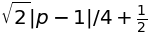

In [59]:
display(Math(r"\frac{1}{2} + \frac{1}{4} \left|A(| 0 > < 0| ) - A(| +> < +| ) \right|_1 = "))
distingush_probablity(A(state0), A(stateplus))

The probablity is $- \frac{\sqrt{2} p}{4} + \frac{\sqrt{2}}{4} + \frac{1}{2}$.

In [98]:
operator0 = simplify(transpose(Matrix([[cos(pi/8), sin(pi/8) ]]))* Matrix([[cos(pi/8), sin(pi/8) ]]))
operator1 = simplify(transpose(Matrix([[-sin(pi/8), cos(pi/8) ]]))* Matrix([[-sin(pi/8), cos(pi/8) ]]))

The optimal measurement operators $A_0$ and $A_1$ (same as the ones we find in homework 1) are:

In [113]:
display(Math(r" A_0 = ")); operator0

<IPython.core.display.Math object>

⎡√2   1     √2   ⎤
⎢── + ─     ──   ⎥
⎢4    2     4    ⎥
⎢                ⎥
⎢  √2      √2   1⎥
⎢  ──    - ── + ─⎥
⎣  4       4    2⎦

In [114]:
display(Math(r" A_1 = ")); operator1

<IPython.core.display.Math object>

⎡  √2   1   -√2  ⎤
⎢- ── + ─   ──── ⎥
⎢  4    2    4   ⎥
⎢                ⎥
⎢  -√2     √2   1⎥
⎢  ────    ── + ─⎥
⎣   4      4    2⎦

Verification:

<IPython.core.display.Math object>

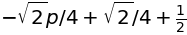

In [115]:
display(Math(r"tr( A_0 A(| 0 > < 0| ) A_0^\dagger) = "))
simplify(trace(operator0*A(state0)*operator0)) 

<IPython.core.display.Math object>

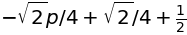

In [116]:
display(Math(r"tr( A_1 A(| 1 > < 1| ) A_1^\dagger) = "))
simplify(trace(operator1*A(state1)*operator1)) 